In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Correct path to your dataset
path = r"C:\Users\samru\Desktop\Portfolio\Maven\Pyython\Fuel Data\auto-mpg.csv"

# Load dataset
df = pd.read_csv(path)

# Preview
print(df.shape)
df.head()


(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
# Check data info
df.info()

# Replace '?' with NaN and fix horsepower column
df['horsepower'] = pd.to_numeric(df['horsepower'].replace('?', np.nan))

# Fill missing horsepower with median
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Convert origin to category
df['origin'] = df['origin'].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    f

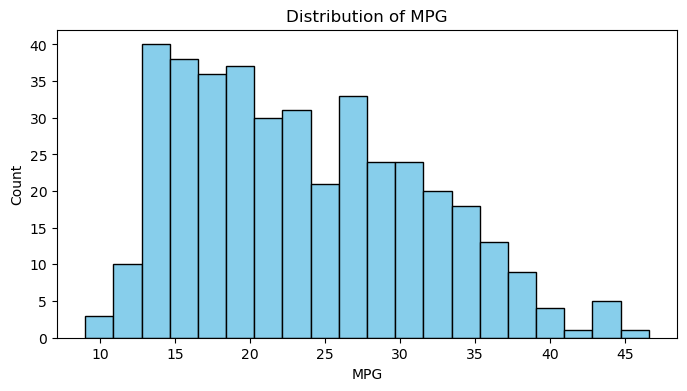

In [3]:
df.describe().T

plt.figure(figsize=(8,4))
plt.hist(df['mpg'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Count')
plt.show()


In [4]:
corr = df['weight'].corr(df['mpg'])
print("Correlation between weight and mpg:", round(corr, 2))


Correlation between weight and mpg: -0.83


In [5]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_absolute_error
import statsmodels.api as sm

# Display settings
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Load dataset
path = r"C:\Users\samru\Desktop\Portfolio\Maven\Pyython\Fuel Data\auto-mpg.csv"
df = pd.read_csv(path)

# Check data shape and preview
print(df.shape)
df.head()


(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.000,8,307.000,130,3504,12.000,70,1,chevrolet chevelle malibu
1,15.000,8,350.000,165,3693,11.500,70,1,buick skylark 320
2,18.000,8,318.000,150,3436,11.000,70,1,plymouth satellite
3,16.000,8,304.000,150,3433,12.000,70,1,amc rebel sst
4,17.000,8,302.000,140,3449,10.500,70,1,ford torino


In [6]:
# Check data types and missing values
df.info()

# Replace '?' in horsepower with NaN and convert to numeric
df['horsepower'] = pd.to_numeric(df['horsepower'].replace('?', np.nan))

# Fill missing horsepower with median
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

# Convert 'origin' to categorical
df['origin'] = df['origin'].astype('category')

# Drop 'car name' since it’s not useful for regression
df.drop(columns=['car name'], inplace=True)

# Check again
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    f

C:\Users\samru\AppData\Local\Temp\ipykernel_23104\4294461174.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.000,8,307.000,130.000,3504,12.000,70,1
1,15.000,8,350.000,165.000,3693,11.500,70,1
2,18.000,8,318.000,150.000,3436,11.000,70,1
3,16.000,8,304.000,150.000,3433,12.000,70,1
4,17.000,8,302.000,140.000,3449,10.500,70,1


In [7]:
df.fillna({'horsepower': df['horsepower'].median()}, inplace=True)


In [8]:
# Replace '?' with NaN and convert to numeric
df['horsepower'] = pd.to_numeric(df['horsepower'].replace('?', np.nan))

# Fill missing horsepower with median (future-safe)
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Convert 'origin' to categorical
df['origin'] = df['origin'].astype('category')


In [9]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)

# Quick look at the data
df.head()


Missing values per column:
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

Data types:
 mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
model year         int64
origin          category
dtype: object


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.000,8,307.000,130.000,3504,12.000,70,1
1,15.000,8,350.000,165.000,3693,11.500,70,1
2,18.000,8,318.000,150.000,3436,11.000,70,1
3,16.000,8,304.000,150.000,3433,12.000,70,1
4,17.000,8,302.000,140.000,3449,10.500,70,1


In [10]:
# Summary statistics for numeric columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
mpg,398.000,23.515,7.816,9.000,17.500,23.000,29.000,46.600
cylinders,398.000,5.455,1.701,3.000,4.000,4.000,8.000,8.000
displacement,398.000,193.426,104.270,68.000,104.250,148.500,262.000,455.000
horsepower,398.000,104.304,38.223,46.000,76.000,93.500,125.000,230.000
weight,398.000,2970.425,846.842,1613.000,2223.750,2803.500,3608.000,5140.000
acceleration,398.000,15.568,2.758,8.000,13.825,15.500,17.175,24.800
model year,398.000,76.010,3.698,70.000,73.000,76.000,79.000,82.000


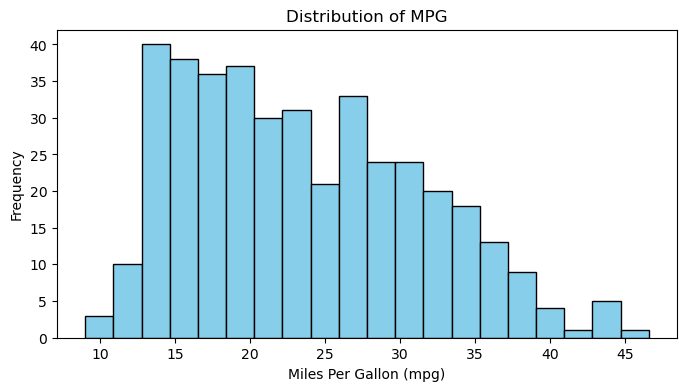

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(df['mpg'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of MPG')
plt.xlabel('Miles Per Gallon (mpg)')
plt.ylabel('Frequency')
plt.show()


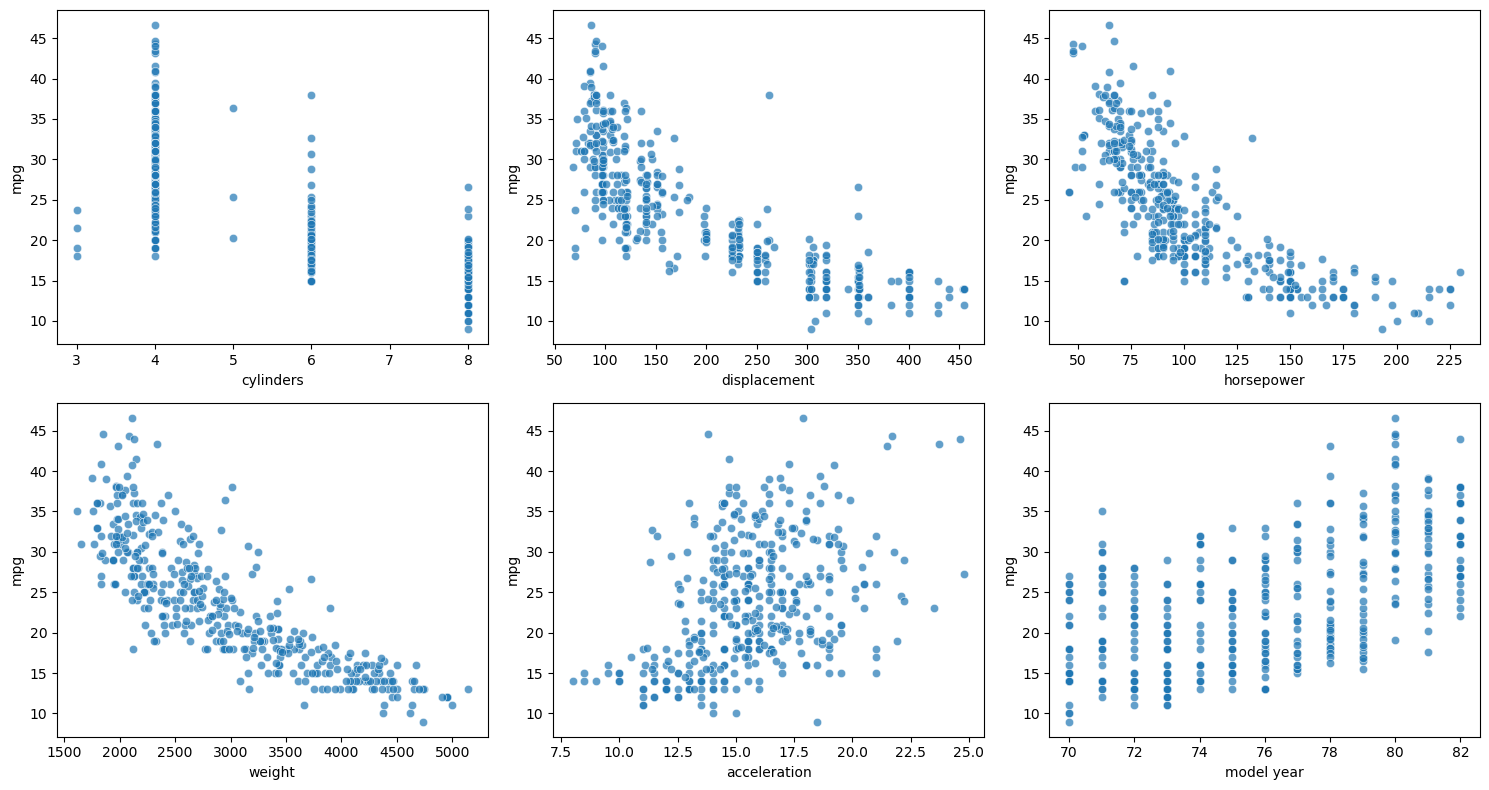

In [12]:
import seaborn as sns

# List of numeric columns
num_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

# Create scatter plots
plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x=df[col], y=df['mpg'], alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('mpg')
plt.tight_layout()
plt.show()


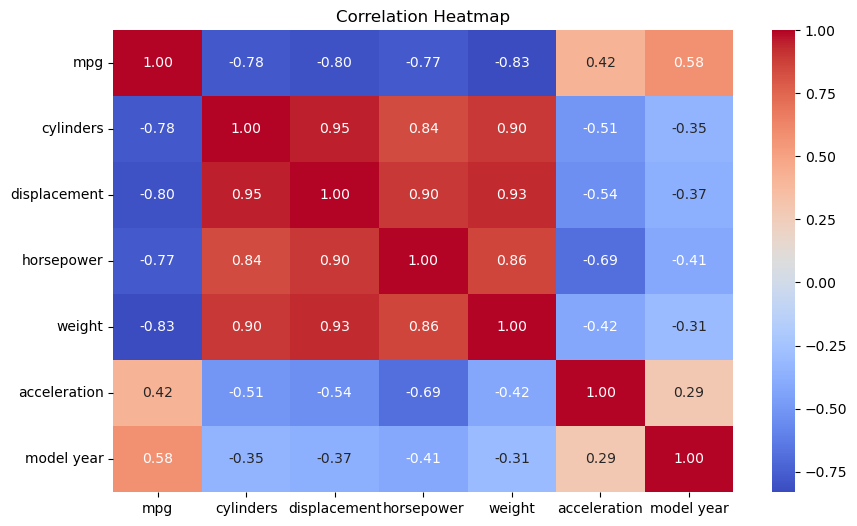

mpg             1.000
model year      0.579
acceleration    0.420
horsepower     -0.773
cylinders      -0.775
displacement   -0.804
weight         -0.832
Name: mpg, dtype: float64


In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# List correlations with mpg
corr_with_mpg = df.corr(numeric_only=True)['mpg'].sort_values(ascending=False)
print(corr_with_mpg)


In [14]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df[['cylinders','displacement','horsepower','weight','acceleration','model year','origin']]
y = df['mpg']

# Convert categorical 'origin' into dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check sizes
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (318, 8)
Test shape: (80, 8)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Simple linear regression with 'weight' only
X_simple = df[['weight']]
y_simple = df['mpg']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

lr_simple = LinearRegression()
lr_simple.fit(X_train_s, y_train_s)

y_pred_s = lr_simple.predict(X_test_s)

# Evaluate
print("R² (Simple):", round(r2_score(y_test_s, y_pred_s), 3))
print("MAE (Simple):", round(mean_absolute_error(y_test_s, y_pred_s), 3))


R² (Simple): 0.723
MAE (Simple): 3.118


In [16]:
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)

y_pred_multi = lr_multi.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred_multi)
mae = mean_absolute_error(y_test, y_pred_multi)

print("R² (Multiple):", round(r2, 3))
print("MAE (Multiple):", round(mae, 3))


R² (Multiple): 0.845
MAE (Multiple): 2.288


In [17]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_multi.coef_
}).sort_values(by='Coefficient', ascending=False)

coeff_df


,Feature,Coefficient
6,origin_2,2.947
7,origin_3,2.671
5,model year,0.826
4,acceleration,0.068
1,displacement,0.020
3,weight,-0.007
2,horsepower,-0.015
0,cylinders,-0.166


In [18]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("R² (Ridge):", round(r2_score(y_test, y_pred_ridge),3))
print("MAE (Ridge):", round(mean_absolute_error(y_test, y_pred_ridge),3))


R² (Ridge): 0.845
MAE (Ridge): 2.292


In [19]:
corr = df['weight'].corr(df['mpg'])
print("Correlation between weight and mpg:", round(corr, 2))


Correlation between weight and mpg: -0.83


In [1]:
df.to_csv("cleaned_auto_mpg.csv", index=False)


NameError: name 'df' is not defined

In [2]:
coeff_df.to_csv("regression_coefficients.csv", index=False)


NameError: name 'coeff_df' is not defined

In [3]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np

# Step 2: Load your dataset
df = pd.read_csv(r"C:\Users\samru\Desktop\Portfolio\Maven\Pyython\Fuel Data\auto-mpg.csv")

# Step 3: Clean the data
# Replace '?' with NaN and convert 'horsepower' to numeric
df['horsepower'] = pd.to_numeric(df['horsepower'].replace('?', np.nan))

# Fill missing values with median
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Convert 'origin' to categorical
df['origin'] = df['origin'].astype('category')

# Optional check
print("✅ Data cleaned successfully!")
df.head()


✅ Data cleaned successfully!


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
df.to_csv("cleaned_auto_mpg.csv", index=False)


In [5]:
df.to_csv(r"C:\Users\samru\Desktop\Portfolio\Maven\Pyython\Fuel Data\cleaned_auto_mpg.csv", index=False)


In [6]:
import os
print(os.path.exists(r"C:\Users\samru\Desktop\Portfolio\Maven\Pyython\Fuel Data\cleaned_auto_mpg.csv"))


True


In [7]:
# Basic summary
print("✅ Dataset Overview")
print(df.info())

# Quick summary statistics
print("\n🔹 Summary statistics:")
display(df.describe(include='all'))


✅ Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    int64   
 7   origin        398 non-null    category
 8   car name      398 non-null    object  
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 25.5+ KB
None

🔹 Summary statistics:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.0,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.0,6
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,NaN,NaN
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,NaN,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,NaN,NaN


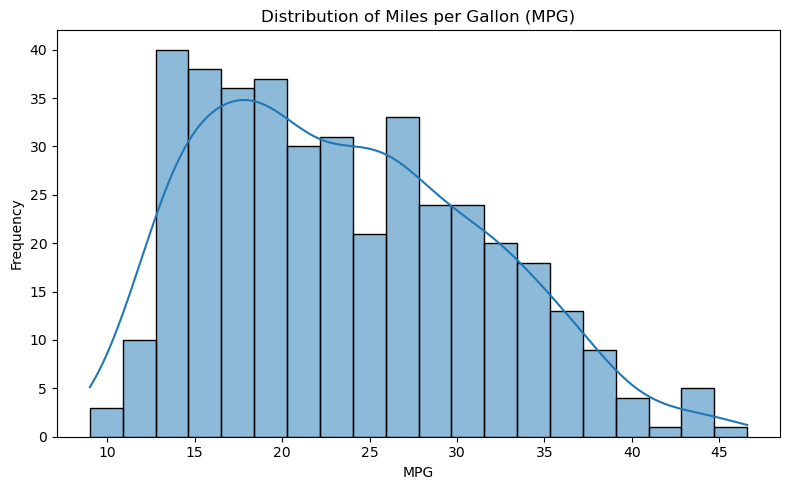

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['mpg'], bins=20, kde=True)
plt.title("Distribution of Miles per Gallon (MPG)")
plt.xlabel("MPG")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("mpg_distribution.png", dpi=300)
plt.show()


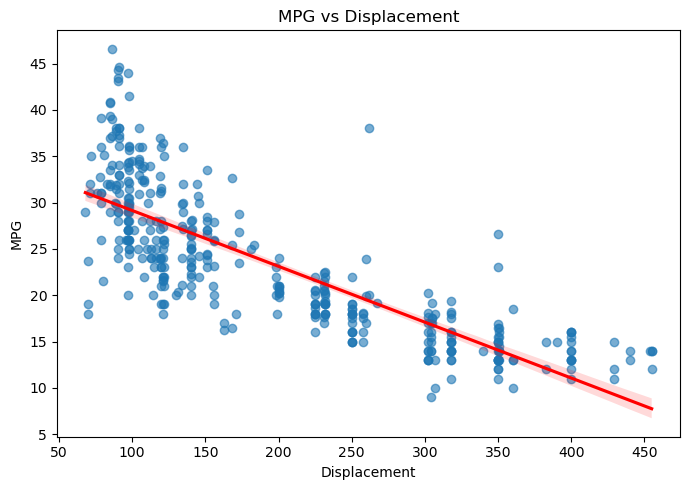

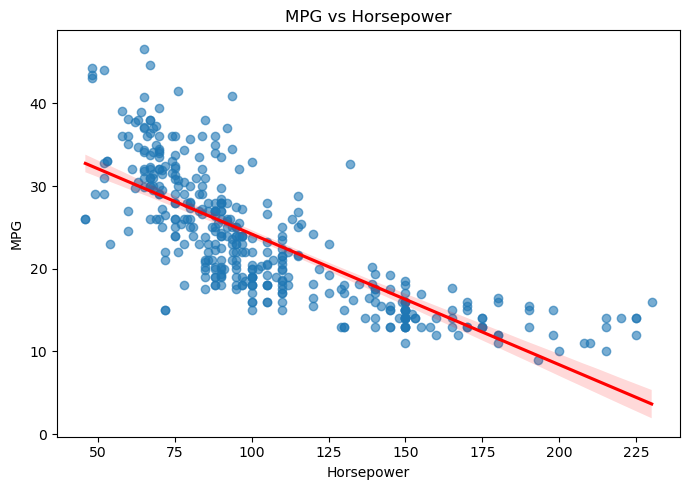

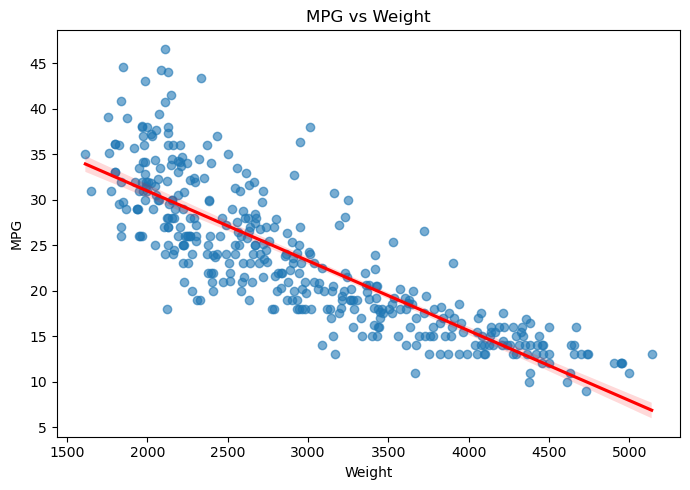

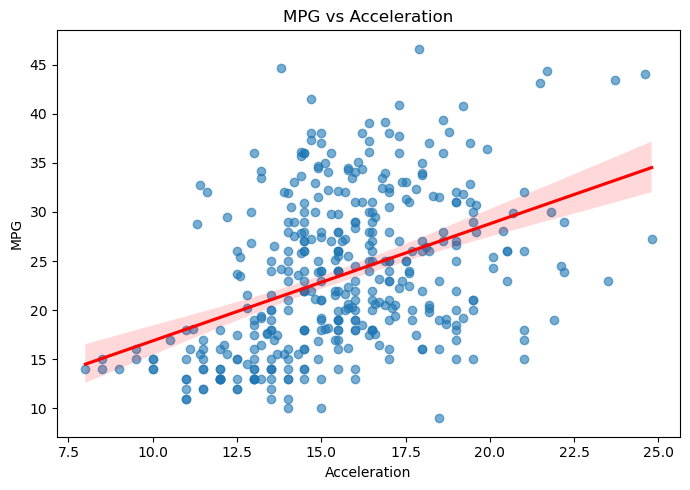

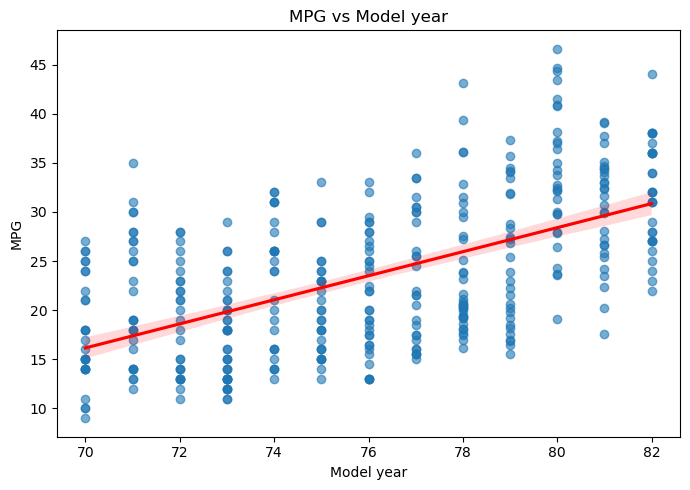

In [9]:
numeric_features = ['displacement', 'horsepower', 'weight', 'acceleration', 'model year']

for col in numeric_features:
    plt.figure(figsize=(7,5))
    sns.regplot(x=df[col], y=df['mpg'], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f"MPG vs {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("MPG")
    plt.tight_layout()
    plt.savefig(f"mpg_vs_{col}.png", dpi=300)
    plt.show()


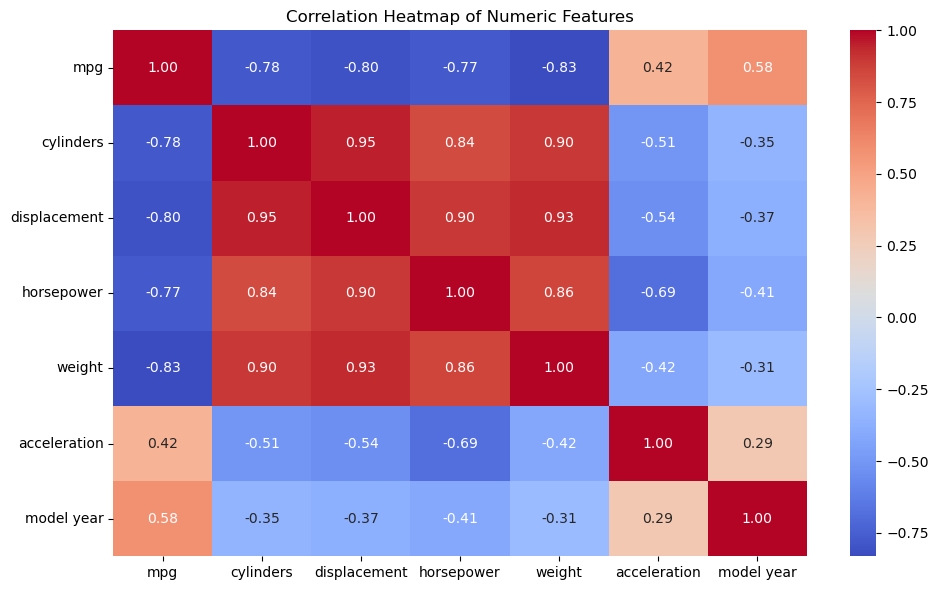

🔹 Correlation of each variable with MPG:

mpg             1.000000
model year      0.579267
acceleration    0.420289
horsepower     -0.773453
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64


In [10]:
plt.figure(figsize=(10,6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()

# Identify strongest correlation with mpg
corr_target = corr_matrix['mpg'].sort_values(ascending=False)
print("🔹 Correlation of each variable with MPG:\n")
print(corr_target)


In [13]:
corr_target.round(2).to_csv("mpg_correlations.csv", header=['Correlation'])


In [12]:
import os
for f in os.listdir():
    if f.endswith(".png"):
        print(f)


correlation_heatmap.png
mpg_distribution.png
mpg_vs_acceleration.png
mpg_vs_displacement.png
mpg_vs_horsepower.png
mpg_vs_model year.png
mpg_vs_weight.png
